## Equilibrium and stability basic analysis
### (Canard sizing)

Nemo human powered hydrofoil

June 2016 - Gustavo Violato, Diego Montero, Fernando Valentini

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib notebook

In [225]:
# Constants definitions
grav = 9.80665 # gravity [m/s^2]
rho_w = 1020 # (sea) water density [kg/m^3]

mass   = 101  # total vehicle mass [kg]
Sref   = 0.22 # (wing) reference area [m^2]
cr     = 0.153
ctip   = 0.45*0.153
cma    = 2./3*(cr+ctip-cr*ctip/(cr+ctip))

V_cruise = 3 # cruise speed [m/s]
Q_cruise = 0.5*rho_w*V_cruise**2

C_factor = 0.06
Xc = 2.3/2+0.25
Xw = 0.09
Xt = Xc + Xw

wing_polar_file = 'gv03.pol'
pol_data = np.loadtxt(wing_polar_file,skiprows=12)

In [226]:
CL_cruise = mass*grav/(Q_cruise*Sref)*(1-C_factor)
cl2a = interp1d(pol_data[:,1],pol_data[:,0])
a2cl = interp1d(pol_data[:,0],pol_data[:,1])
a2cd = interp1d(pol_data[:,0],pol_data[:,2])
a2cm = interp1d(pol_data[:,0],pol_data[:,4])
cl2cd = lambda cl: a2cd(cl2a(cl))

In [227]:
a_w_cruise  = cl2a(CL_cruise)
Cm_w_cruise = a2cm(a_w_cruise)
Cd_w_cruise = cl2cd(CL_cruise)

<IPython.core.display.Javascript object>


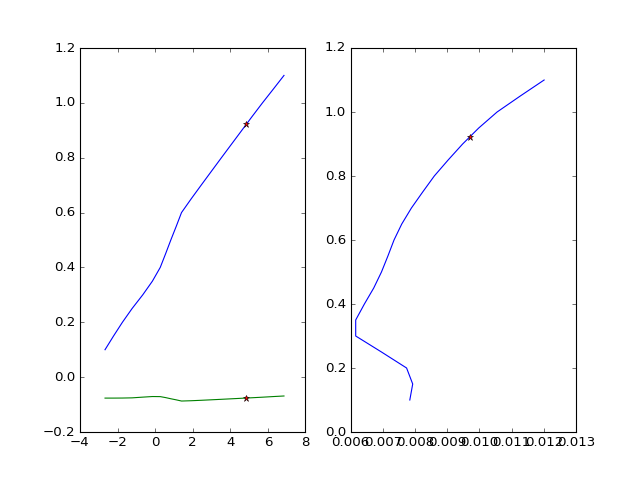

In [228]:
ax1 = plt.subplot(1,2,1)
ax1.plot(pol_data[:,0],pol_data[:,1])
ax1.plot(pol_data[:,0],pol_data[:,4])
ax1.plot(a_w_cruise,CL_cruise,'r*')
ax1.plot(a_w_cruise,Cm_w_cruise,'r*')
ax2 = plt.subplot(1,2,2)
ax2.plot(pol_data[:,2],pol_data[:,1])
ax2.plot(Cd_w_cruise,CL_cruise,'r*')
plt.show()

In [229]:
M_w_cruise = Q_cruise*Cm_w_cruise*cma*Sref
M_c_cruise = M_w_cruise*(C_factor)**1.5
Lw = (M_c_cruise + M_w_cruise + mass*grav*Xc)/Xt
Lc = (-M_c_cruise - M_w_cruise + mass*grav*Xw)/Xt
CL_c_cruise = Lc/(Q_cruise*Sref*C_factor)
print Lw/grav, Lc/grav, M_w_cruise, M_c_cruise, CL_c_cruise, CL_cruise

94.2784791367 6.72152086331 -8.94040278603 -0.131396549524 1.0879316461 0.922007675777


In [230]:
E = 0.98
Xn = Xt/(C_factor/E + 1)
print Xn, Xt - Xn

1.40403846154 0.0859615384615


In [231]:
A_c = Sref*C_factor
b_c = 0.32
c_c = A_c/b_c
AR_c = b_c**2/A_c
print b_c, c_c, AR_c

0.32 0.04125 7.75757575758


In [233]:
1020*0.041*3/(1e-3)

125460.0

In [236]:
diam_q = 30
t_q = 0.18
cq = diam_q/t_q
Cd0 = 0.02
Dq = 0.5*1020*4**2*Cd0*cq*0.6/1000
Dq/9.80665

1.6641768595799793